## n-gram Language Models and Hierarchical Clustering 

## OBJECTIVE : 

Your task is to train n-gram language models. [Ref SLP Chapter 3]

- Task 1: You will train unigram, bigram, and trigram models on given training files. Then you will score on given test files for unigram, bigram, and trigram. you will generate sentences from the trained model and compute perplexity.
- Task 2: You will create training data for n > 3. and Repeat the above task from training model.


In [1]:
'''
Your imports go here
You are encouraged to implement your own functions and not use from library.
'''
import sys
from collections import Counter
import numpy as np

In [2]:
# constants to define pseudo-word tokens
# access via UNK, for instance
# for this assignemnt we will follow <s> tag for beginning of sentence and
# </s> for end of senetence as suggested in SLP Book. Check sample training files for reference.
UNK = "<UNK>"
SENT_BEGIN = "<s>"
SENT_END = "</s>"

We need to initialise global variables for model

In [3]:

"""Initializes Parameters:
  n_gram (int): the n-gram order.
  is_laplace_smoothing (bool): whether or not to use Laplace smoothing
  threshold: words with frequency  below threshold will be converted to token
"""
# Initializing different object attributes
n_gram = 2
is_laplace_smoothing = True
vocab = [] 
n_gram_counts = {}
n_minus_1_gram_counts = 0
threshold = 1


Implement training function

In [4]:
def make_ngrams(tokens, n):
    """Creates n-grams for the given token sequence.
    Args:
    tokens (list): a list of tokens as strings
    n (int): the length of n-grams to create

    Returns:
    list: list of tuples of strings, each tuple being one of the individual n-grams
    """
    n_grams = []

    #temp=zip(*[words[i:] for i in range(0,ngram)])
    #n_grams=[' '.join(ngram) for ngram in temp]
    
    n_grams= zip(*[tokens[i:] for i in range(n)])
    
    return n_grams
    
   

In [5]:
def train(training_file_path):
    """Trains the language model on the given data. Input file that
    has tokens that are white-space separated, has one sentence per line, and
    that the sentences begin with <s> and end with </s>
    Parameters:
      training_file_path (str): the location of the training data to read

    Returns:
    N Gram Counts, Vocab, N Minus 1 Gram Counts
  """
    n_minus_1_gram_counts={}
    
    # Read and split data to get list of words
    
    with open(training_file_path, 'r') as fh:
        content = fh.read().split() 
    
    # Get the count of each word
    
    count_dict = Counter(content)
    
    # Replace the words with <UNK> if count is < threshold(=1)
    uni_count = {} 
    replaced_words= []
    for i in count_dict:
        count = count_dict[i]
        if count <= threshold:
            replaced_words.append(i)
            if UNK in uni_count :
                uni_count [UNK] = uni_count [UNK] + 1
            else:
                uni_count [UNK] = 1
        else:
            uni_count [i] = count
   
    content = [UNK if word in replaced_words else word for word in content]
    
    # make use of make_n_grams function
    
    if n_gram == 1:
        n_gram_l = content
    else:
        n_gram_l = make_ngrams(content, n_gram)
        
    if n_gram == 1:
         n_gram_counts = uni_count
    else:
        x = Counter(n_gram_l)
        n_gram_counts = dict(x)
    
    # Get the training data vocabulary
    y= set(content)
    vocab = list(y)
    
    # For n>1 grams compute n-1 gram counts to compute probability
    if n_gram > 1:
        n_minus_1_gram_l = make_ngrams(content, n_gram - 1)
        n_minus_1_gram_counts = Counter(n_minus_1_gram_l )
    else:
        n_minus_1_gram_l = None
        n_minus_1_gram_counts = None
   
    return n_gram_counts, vocab, n_minus_1_gram_counts

Output your Trained Data Parameters:

In [6]:
n_gram_counts, vocab, n_minus_1_gram_counts = train("berp-training_bi.txt")
print(n_gram_counts)
print(vocab)

{('<s>', "let's"): 196, ("let's", 'start'): 170, ('start', 'over'): 403, ('over', '</s>'): 367, ('</s>', '<s>'): 6755, ('<s>', 'my'): 6, ('my', 'mother'): 2, ('mother', 'is'): 1, ('is', 'coming'): 1, ('coming', 'to'): 1, ('to', 'visit'): 2, ('visit', 'and'): 1, ('and', "i'd"): 5, ("i'd", 'like'): 495, ('like', 'to'): 953, ('to', 'take'): 12, ('take', '<UNK>'): 3, ('<UNK>', 'to'): 14, ('to', 'dinner'): 12, ('dinner', '</s>'): 224, ('<s>', 'new'): 1, ('new', 'query'): 1, ('query', '</s>'): 2, ('<s>', 'now'): 7, ('now', "i'm"): 8, ("i'm", 'interested'): 35, ('interested', 'in'): 39, ('in', 'some'): 5, ('some', 'middle'): 5, ('middle', 'eastern'): 14, ('eastern', 'food'): 10, ('food', '</s>'): 670, ('<s>', 'oh'): 29, ('oh', 'i'): 11, ('i', 'have'): 91, ('have', 'to'): 17, ('to', 'breakfast'): 1, ('breakfast', '</s>'): 89, ('i', 'increase'): 1, ('increase', 'the'): 2, ('the', 'walking'): 3, ('walking', 'distance'): 47, ('distance', 'i'): 3, ('i', 'can'): 69, ('can', 'go'): 14, ('go', 'fifte

Implement Score function that will take input sentence and output probability of given string representing a single sentence.

In [7]:
def score(sentence):
    """Calculates the probability score for a given string representing a single sentence.
    Parameters:
      sentence (str): a sentence with tokens separated by whitespace to calculate the score of
      
    Returns:
      float: the probability value of the given string for this model
    """
    # Split the input sentence and replace out of vocabulary tokens with <UNK>
    tokens = sentence.split()
    tokens = [token if token in vocab else UNK for token in tokens]
    n = n_gram
    Prob = []
    num_count = 0
    denom_count= 0
    # Calculate probability for each word and multiply(or take log and sum) them to get the sentence probability
    # For unigram:
    if n == 1:
        denom_count_actual= len(n_gram_l)
        for i in range(len(tokens)):
            denom_count = denom_count_actual
            if tokens[i] in n_gram_counts:
                num_count = n_gram_counts[tokens[i]]
            else:
                num_count = 0
            if is_laplace_smoothing:
                num_count = num_count+ 1
                denom_count = denom_count + len(vocab)
        Prob.append(num_count/ denom_count)
    else:
        for i in range(n, len(tokens) + 1):
            if tuple(tokens[i-n : i]) in n_gram_counts:
                num_count = n_gram_counts[tuple(tokens[i-n : i])]
            else: 
                num_count = 0 
                denom_count = n_minus_1_gram_counts[tuple(tokens[i - n: i - 1])]
            if is_laplace_smoothing:
                num_count =num_count + 1
                denom_count= denom_count + len(vocab)
        Prob.append(num_count/ denom_count)
        
    log_prob =np.log(np.array(Prob))
    prob_sum = np.sum(log_prob)
    probablity = np.exp( prob_sum)
    return probablity

In [8]:
with open("hw2-test_bi.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  100


In [9]:
# print probabilities/score of sentences in test content
for sentence in test_content:
    probablities.append(score(sentence))
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)
print(probablities)

[0.00947996 0.02139762 0.02832556 0.03482433 0.01083424 0.01563226
 0.08270134 0.02274486 0.00428397 0.07475623 0.00324675 0.19952423
 0.00170252 0.03647526 0.00130011 0.16540267 0.02383532 0.02853016
 0.01215842 0.00757986 0.00213317 0.04967603 0.00286775 0.02615122
 0.12305212 0.00505598 0.01273023 0.0028169  0.00335393 0.00027086
 0.10385389 0.00512164 0.00303359 0.03886782 0.02708559 0.01260711
 0.00232162 0.00460455 0.09954908 0.05182376 0.00139297 0.00108342
 0.00176056 0.07672977 0.02708559 0.03448276 0.01572552 0.00297941
 0.10673503 0.00288913 0.04422188 0.062026   0.03114843 0.09967497
 0.09967497 0.00938967 0.0012382  0.00595883 0.02076562 0.01692849
 0.13289996 0.00156495 0.00531697 0.00650054 0.01066756 0.05513422
 0.16540267 0.01625135 0.01245937 0.04135067 0.07411386 0.01260711
 0.00505598 0.04730888 0.04980152 0.00107759 0.0024377  0.04442037
 0.17841    0.00372873 0.00606717 0.02419646 0.00069751 0.08911392
 0.00648649 0.0067714  0.00215169 0.00084266 0.12188516 0.0169

Generate sentence from the above trained model

In [10]:
def generate_sentence():
    """Generates a single sentence from a trained language model using the Shannon technique.
      
    Returns:
      str: the generated sentence
    """
    # Start with <s> and randomly generate Random_words until we encounter sentence end
    Random_words = ["<s>"]
    n = n_gram

    # Append sentence begin markers for n>2
    for i in range(n - 2):
        Random_words.append("<s>")

    # Keep track of previous word for stop condition
    previous_word = "<s>"
    count = 0
    if n > 1:
        while previous_word != "</s>":
        # Construct the (n-1) gram so far
            n_1_gram= Random_words[count:n - 1 + count]
            previous_tuple = tuple(n_1_gram)
        # Get the counts of all available choices based on n-1 gram
            available_choice_space = {tupl[-1]: n_gram_counts[tupl] for tupl in n_gram_counts if tupl[:-1] == previous_tuple}
        # Convert the counts into probability for random.choice() function
            l1=list(available_choice_space.values())
            dist = np.array(l1)
            prob =  dist/ np.sum(dist)
            l2= list(available_choice_space.keys())
            word_generated = np.random.choice(np.array(l2), p=prob)
        # If <s> is generated, ignore and generate another word
            if word_generated == "<s>":
                continue
            Random_words.append(word_generated)
            previous_word = word_generated
            count = count + 1
    else:
      # In case of unigram model, n-1 gram is just the previous word and possible choice is whole vocabulary
      while previous_word != "</s>":
        
        # Convert the counts into probability for random.choice() function
        l3= list(n_gram_counts.values())
        dist = np.array(l3)
        prob =  dist/ np.sum(dist)
        l4= list(n_gram_counts.keys())
        word_generated = np.random.choice(np.array(l4), p=prob)
        
        # If <s> is generated, ignore and generate another word
        if word_generated == "<s>":
            continue
        Random_words.append(word_generated)
        previous_word = word_generated

    # Append sentence end markers for n>2
    for i in range(n - 2):
        Random_words.append("</s>")
    return " ".join(Random_words)

In [11]:
def generate(n):
    """Generates n sentences from a trained language model using the Shannon technique.
    Parameters:
      n (int): the number of sentences to generate
      
    Returns:
      list: a list containing strings, one per generated sentence
    """
    # Generate sentences one by one and store
    sentences = []
    for i in range(n):
        sentences.append(generate_sentence())
    return sentences

In [12]:
sentences = generate(50)
print("Sentences:")
for sentence in sentences:
    print(sentence)

Sentences:
<s> uh dinner </s>
<s> uh i would like to eat this sunday </s>
<s> i'm willing to spend any price in berkeley have nineteen ninety minutes </s>
<s> do you have lunch </s>
<s> does sun-hong-kong </s>
<s> i'll spend sixty dollars </s>
<s> i could you recommend uh i was chez-panisse </s>
<s> only want to eat on a mile </s>
<s> uh i'd like </s>
<s> south american food from icsi open <UNK> </s>
<s> i want pancakes for dinner tomorrow on foot </s>
<s> uh eight dollars </s>
<s> let's start again </s>
<s> i'd like that are available </s>
<s> i want thai food </s>
<s> any places that are they serve any weekday </s>
<s> start over </s>
<s> make a saturday </s>
<s> ten minutes </s>
<s> tell me about plearn restaurant </s>
<s> can you have lunch </s>
<s> uh to spend a hundred meters </s>
<s> start over </s>
<s> where is spats open on saturday </s>
<s> howbout an indian food </s>
<s> i would like to eat on long life vegi food give me the week from <UNK> on shattuck avenue </s>
<s> the di

Measures the perplexity for the test sequence with your trained model. 
you may assume that this sequence may consist of many sentences "glued together"

The perplexity of the given sequence is the inverse probability of the test set, normalized by the number of words.


In [13]:
# Since this sequence will cross many sentence boundaries, we need to include 
# the begin- and end-sentence markers <s> and </s> in the probability computation. 
# We also need to include the end-of-sentence marker </s> 
# but not the beginning-of-sentence marker <s>) in the total count of word tokens N

def perplexity(test_sequence):
    """.
    Parameters:
      test_sequence (string): a sequence of space-separated tokens to measure the perplexity of

    Returns:
      float: the perplexity of the given sequence
    """ 

    # Replace out of vocab words with <UNK>, already done in score function
    #test_sequence = [token if token in vocab else UNK for token in test_sequence.split()]
    test_sequence_new = [token for token in test_sequence.split() if token != "<s>"]

    # Remove sentence begin markers from data for computing N
    # Get the probability for the sequence
    prob_score = score(test_sequence)
    k = (-1/ len(test_sequence_new))
    perplexity = (prob_score) ** k
    return perplexity

In [14]:
print(perplexity(" ".join(sentences[0:10])))

1.0974635188845234


* Experiment n_gram model for n = [1,2,3..7] of your choice. Explain the best choice of n that generates more meaninful sentences.


When checking for n=1,2,3, The perplexity gets reduced as we increase the choice of n. Hence a trigram model gives the lowest perplexity and generates more meaningful sentences. Hence increasing n can reduce a bit of perplexity and it becomes constant after a certain point.

# <CENTER> PART-B</CENTER> 

### OBJECTIVE : In this unsupervised learning task we are going to cluster wikipedia articles into groups using Hierarchical clustering

#### Download articles from Wikipedia
In this section we will download articles from wikipedia and then cluster them into groups in the next step. You can select somewhat related topics or fetch the articles randomly. 

(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [15]:
!pip install wikipedia

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import wikipedia
from wikipedia.exceptions import WikipediaException
import pandas as pd

'''
 Generate a list of wikipedia article titles to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse datset to work with. 
 Ex- About 10+ categories with 3+ article in each category
'''
# list of articles to be downloaded
articles = ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]
# download and store all the articles in this variable
data=[]
for x in articles:
    print("Article successfully downloaded: ", x)
    try:
        data.append(wikipedia.page(x, auto_suggest=False).content)
        
    except WikipediaException as e:
        
        print("Article download Failed: ", x)




Article successfully downloaded:  Northeastern Unversity
Article successfully downloaded:  Natural language processing
Article successfully downloaded:  Machine learning
Article successfully downloaded:  Quantum machine learning
Article successfully downloaded:  Artificial intelligence
Article successfully downloaded:  Data science
Article successfully downloaded:  Master in Data Science
Article successfully downloaded:  Bank of America
Article successfully downloaded:  Visa Inc.
Article successfully downloaded:  European Central Bank
Article successfully downloaded:  Bank
Article successfully downloaded:  Financial technology
Article successfully downloaded:  International Monetary Fund
Article successfully downloaded:  Basketball
Article successfully downloaded:  Swimming
Article successfully downloaded:  Tennis
Article successfully downloaded:  Football
Article successfully downloaded:  College Football
Article successfully downloaded:  Association Football



### Cleaning the Data
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1

In [17]:
# You can use Assignment 1's clean message function
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
ps=PorterStemmer()
def clean_message(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message. 

    '''
    message1 = re.sub(r'^https?:\/\/.*[\r\n]*', '', message) # removing links
    message2 = re.sub(r'[^\w\s]','',message1) #removing punctuations
    Words= word_tokenize(message2)
    messages=[word for word in Words if word not in stopwords.words('english')]
    messages_cleaned = [ps.stem(word) for word in messages]
    return " ".join(messages_cleaned)

data = [clean_message(i) for i in data]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIRISHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIRISHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Vectorize the articles
In this step, we will vectorize the text data to use in hierarchical clustering. You can use countVectorizer() or TfidfVectorizer() from sklearn library.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words={'english'}, max_features=2500)
g = vectorizer.fit_transform(data)
g = g.toarray()

##Plot Dendogram (5 points)
Now we will try to see the hierarchical relationship between articles using dendrogram.

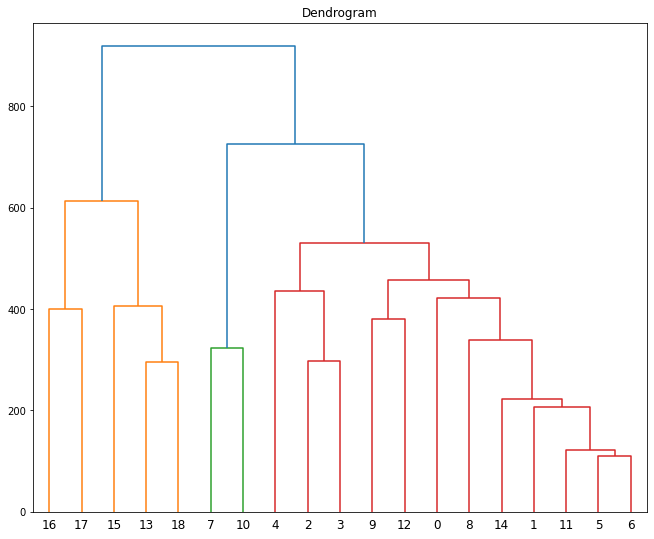

In [19]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(11,9))
plt.title("Dendrogram")    
d = shc.dendrogram(shc.linkage(g, method='ward'))
plt.show()

After plotting the dendogram, you will see that if you cut the dendogram horizontally, you can seperate the data into groups. You will get different number of clusters depending on where you cut.

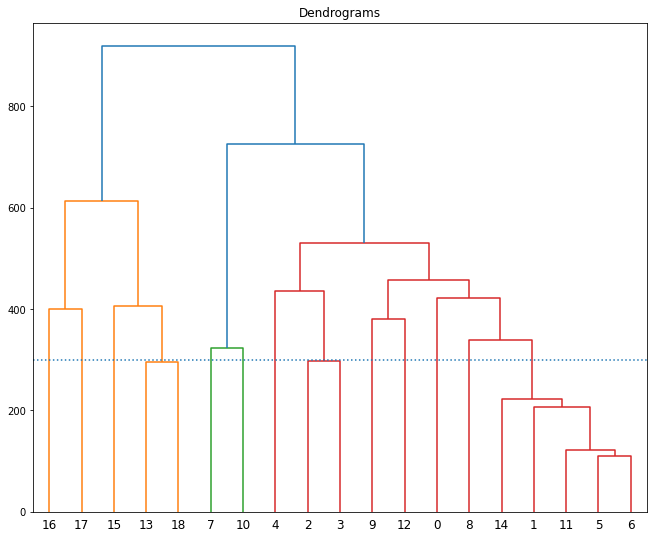

In [20]:
plt.figure(figsize=(11, 9))  
plt.title("Dendrograms")  
d = shc.dendrogram(shc.linkage(g, method='ward'))
plt.axhline(y=300.29, linestyle=':')
plt.show()

### Apply Clustering
In this step, we will assign cluster lables to each document/group using Agglomerative Hierarchical clustering.
We can decide number of clusters based on the dendogram and our requirement (how many categories we want).(eg. n_clusters = 3) 

In [21]:
from sklearn.cluster import AgglomerativeClustering
number_of_clusters = 3
cluster = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='euclidean', linkage='ward')  
category = cluster.fit_predict(g)

In [22]:
z= zip(articles, category)
map_1 = pd.DataFrame(list(z),columns=['Name', 'Cluster'])
c= map_1.sort_values(by=['Cluster'])
print(c)

                           Name  Cluster
18         Association Football        0
16                     Football        0
15                       Tennis        0
13                   Basketball        0
17             College Football        0
14                     Swimming        1
12  International Monetary Fund        1
11         Financial technology        1
0        Northeastern Unversity        1
6        Master in Data Science        1
5                  Data science        1
4       Artificial intelligence        1
3      Quantum machine learning        1
2              Machine learning        1
1   Natural language processing        1
8                     Visa Inc.        1
9         European Central Bank        1
7               Bank of America        2
10                         Bank        2


### Word Clouds
Now, we will try to visualize top 50 words in each cluster using word clouds

In [23]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


In [24]:
# !pip install wordcloud

Cluster - 0
          Basketball
              Tennis
            Football
    College Football
Association Football


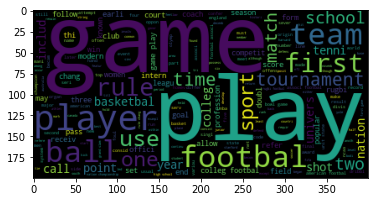

Cluster - 1
     Northeastern Unversity
Natural language processing
           Machine learning
   Quantum machine learning
    Artificial intelligence
               Data science
     Master in Data Science
                  Visa Inc.
      European Central Bank
       Financial technology
International Monetary Fund
                   Swimming


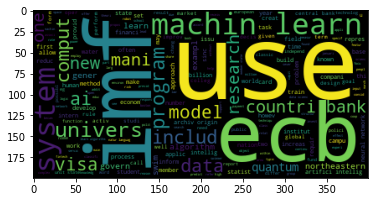

Cluster - 2
Bank of America
           Bank


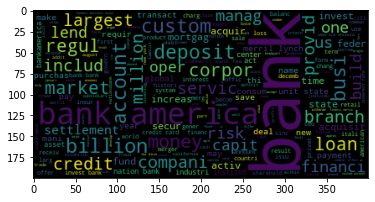

In [25]:
import pandas as pd
from wordcloud import WordCloud
df = pd.DataFrame({'Cluster':category, 'Articles':data})
for k in range(0, number_of_clusters):
    d = df[df.Cluster==k]
    t = d['Articles'].str.cat(sep=' ')
    t = t.lower()
    t_l= [word for word in t.split()]
    t = ' '.join(t_l)
    wordcloud = WordCloud().generate(t)
    print('Cluster - {}'.format(k))
    names = map_1[map_1.Cluster==k]['Name']
    print(names.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud)
    plt.show()

The categories are meaningful as all the sports related articles are clustered into cluster-0, all articles related to education are clustered into cluster -1 and other articles realated to finance are clustered into cluster-2.However, we can still see an overlap of a few words in the clusters. For example, the word bank occurs highly in cluster 1 which is related to education, but it has to be in cluster 2.

Comment about the categorizion done by Hierarchical clustering. Are the groups meaningful?

### Apply Hierarchical clustering on spam dataset
Now we will apply Hierarchical clustering(HC) on a subset(modify the fraction argument of the sample() function) of Assignment 1 data. We will try to see if Hierarchical clustering can perform good or not for a supervised problem. We will follow the same steps as above and apply HC on the message column of spam.csv and categorize them into two clusters.

In [26]:
from sklearn.utils import resample
# Read the data as done in Assignment 1
## Reading the data and removing columns that are not important.

df = pd.read_csv('C:/Users/SIRISHA/Documents/NLP/spam.csv', sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [27]:
## Renaming the columns so that we understand the columns easily.

## Rename v1 as "spam_or_ham" and v2 as "message"
df = df.rename(columns = {'v1': 'spam_or_ham', 'v2': 'message'})
df.head()

,spam_or_ham,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
## hint: use resample from sklearn.utils
from sklearn.utils import resample

df_majority = df[df.spam_or_ham =='ham']
df_minority = df[df.spam_or_ham =='spam']

spam_upsample = resample(df_minority, replace = True, 
                        n_samples = df_majority.shape[0],
                        random_state = 101)

df_upsampled = pd.concat([df_majority, spam_upsample])  # concat two data frames i,e majority class data set and upsampled minority class data set
df_upsampled = df_upsampled.sample(frac = 1)

In [29]:
## Just to ensure that upsampling was done successfully, take a look at the shape of the data in 
## this cell. 

print((df_upsampled[df_upsampled.spam_or_ham=='spam']).shape)

(4825, 2)


In [30]:
df_upsampled["message"] = df_upsampled["message"].apply(clean_message)
messages = df_upsampled["message"].tolist()
h = vectorizer.fit_transform(df_upsampled["message"])

In [31]:
number_of_clusters_spam_ham = 2
cluster_text_classification = AgglomerativeClustering(n_clusters=number_of_clusters_spam_ham, affinity='euclidean', linkage='ward')  
labels_text_classification = cluster_text_classification.fit_predict(h.toarray())
z2 = zip(messages, labels_text_classification)
map_2=pd.DataFrame(list(z2),columns=['Message','Cluster'])
print(map_2.sort_values(by=['Cluster']))

                                                Message  Cluster
2740                        call freephon 0800 542 0578        0
7442  we tri call repli sm video mobil 750 min unlim...        0
2894  forward 21870000hi mailbox messag sm alert you...        0
2895  urgent thi 2nd attempt contact uu won å1000cal...        0
7439  want new video phone 750 anytim network min ha...        0
...                                                 ...      ...
3649          havent left yet probabl gon na til dinner        1
3648  win newest åòharri potter order phoenix book 5...        1
3646  bore speed date tri speedchat txt speedchat 80...        1
3643  u secret admir look 2 make contact ufind rreve...        1
9649                             ok lor ì_ reach messag        1

[9650 rows x 2 columns]


Cluster - 0
you won guarante å1000 cash å2000 prize to clai...
congrat 2 mobil 3g videophon r call 09063458130...
had contract mobil 11 mnth latest motorola noki...
you ve won your 4 costa del sol holiday å5000 a...
4mth half price orang line rental latest camera...
xma offer latest motorola sonyericsson nokia fr...
u r winner u ave special select 2 receiv å1000 ...
4mth half price orang line rental latest camera...
pleas call custom servic repres freephon 0808 1...
forward 21870000hi mailbox messag sm alert you ...
sm auction you nokia 7250i thi get win free auc...
winner as valu network custom select receivea å...
our date servic ask 2 contact u someon shi call...
phoni å350 award today voda number end xxxx sel...
congratul thank good friend u won å2000 xma pri...
uve select stay 1 250 top british hotel for not...
sm auction you nokia 7250i thi get win free auc...
u nokia 6230 plu free digit camera thi u get u ...
for sparkl shop break 45 per person call 0121 2...
urgent thi 2nd atte

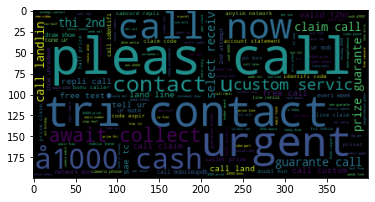

Cluster - 1
thank subscript rington uk mobil charg å5month ...
fuck babe i miss alreadi know cant let send mon...
free2day sexi st georg day pic jordantxt pic 89...
thi girl stay bed thi girl doesnt need recoveri...
                 88066 from 88066 lost 3pound help
want funk ur fone weekli new tone repli tones2u...
                           i need detail onlin job
hello how r u im bore inev thought id get bore ...
hmv bonu special 500 pound genuin hmv voucher j...
                               okay thought expert
wnevr wana fal luv vth book my bed fal luv vth ...
ur award citi break could win å200 summer shop ...
under sea lay rock in rock envelop in envelop p...
                                      wan na art d
                               thought i didnt see
aft finish lunch go str lor ard 3 smth lor u fi...
freemsg hey u got 1 videop fone repli wild txt ...
ye the place town meet excit adult singl uk txt...
    sorri i miss call let talk time im 07090201529
   u studi sch go h

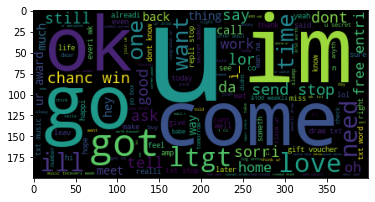

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [32]:
from wordcloud import WordCloud
result = pd.DataFrame({'Cluster':labels_text_classification, 'Message':messages})
for k in range(0, number_of_clusters):
    d = result[result.Cluster==k]
    t = d['Message'].str.cat(sep=' ')
    t = t.lower()
    t = ' '.join([word for word in t.split()])
    wordcloud = WordCloud().generate(t)
    print('Cluster - {}'.format(k))
    names = map_2[map_2.Cluster==k]['Message']
    print(names.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud)
    plt.show()